# Introduction to Convolutional Neural Networks (CNNs)

Images are high-dimensional data, meaning each image contains a large number of pixels, and each pixel has multiple color channels (RGB). In a dataset like CIFAR-100, which contains 100 different object classes, manually extracting useful features from these images is challenging.

**Here's why CNNs are a good choice for this problem:**

- Spatial Hierarchies: CNNs use convolutional layers to learn spatial hierarchies in data, detecting low-level features (like edges) in earlier layers and combining them into more abstract concepts (like shapes and objects) in deeper layers.
- Parameter Efficiency: Instead of fully connecting all neurons (as in traditional feedforward networks), CNNs use filters and local receptive fields, which greatly reduce the number of parameters, making them computationally efficient for image processing.

**CNNs use several techniques, such as:**
- Convolutional Layers: Extract spatial features by applying filters to input images.
- Pooling Layers: Downsample the feature maps, reducing the dimensions while keeping relevant features intact.
- Dense Layers: Combine the high-level features learned by the convolutional layers to produce the final classification.

**CIFAR-100 Dataset**

The CIFAR-100 dataset is a well-known benchmark dataset for image classification tasks. It consists of 60,000 32x32 color images from 100 different classes, including animals, vehicles, and everyday objects. These images are much smaller and more complex than simpler datasets like MNIST or CIFAR-10, making CIFAR-100 a more challenging problem due to its larger number of categories and the fine-grained nature of the classes. CNNs are well-suited to automatically extract the relevant features from these images to classify them into the correct categories.

## Setup

In [ ]:
# Package imports
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models

In [ ]:
# Load in CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print()
print('Dataset Info:')
print('-'*30)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

Dataset Info:
------------------------------
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


## Build the Model

This model consists of three convolutional blocks, each followed by a couple of fully connected (dense) layers that form the classification head. Each convolutional block includes two convolutional layers with Leaky ReLU activations, followed by max-pooling and dropout for regularization.

As we progress through the network, the spatial dimensions of the feature maps decrease with each max-pooling operation, which enhances the model's translation-invariance by downsampling the input. Simultaneously, the model's depth increases, allowing it to learn a richer, more abstract representation of the images. This deeper structure enables the model to capture complex patterns and hierarchical features, which are crucial for classifying the 100 classes in CIFAR-100.

Finally, the dense layers take the learned features and combine them to produce the final classification output using a softmax activation, giving the probability distribution across the 100 classes.

In [ ]:
# Defining model using the Functional API in Keras

# Input layer
inputs = tf.keras.Input(shape=(32, 32, 3))  # [H,W,C]

# Block 1
x = layers.Conv2D(32, (3, 3), padding='same')(inputs)
x = layers.LeakyReLU(negative_slope=0.01)(x)  # Alpha term determines effect of negative slopes
x = layers.Conv2D(32, (3, 3), padding='same')(x)
x = layers.LeakyReLU(negative_slope=0.01)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)  # Reduce spatial dimensions
x = layers.Dropout(0.25)(x)  # Helps stabilize training

# Block 2
x = layers.Conv2D(64, (3, 3), padding='same')(x)
x = layers.LeakyReLU(negative_slope=0.01)(x)
x = layers.Conv2D(64, (3, 3), padding='same')(x)
x = layers.LeakyReLU(negative_slope=0.01)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# Block 3
x = layers.Conv2D(128, (3, 3), padding='same')(x)
x = layers.LeakyReLU(negative_slope=0.01)(x)
x = layers.Conv2D(128, (3, 3), padding='same')(x)
x = layers.LeakyReLU(negative_slope=0.01)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

# Flatten and Fully Connected Layers
# Must flatten to connect spatial image data to FC layers
x = layers.Flatten()(x)
x = layers.Dense(512)(x)
x = layers.LeakyReLU(negative_slope=0.01)(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256)(x)
x = layers.LeakyReLU(negative_slope=0.01)(x)
x = layers.Dropout(0.5)(x)

# Output layer
outputs = layers.Dense(100, activation='softmax')(x)

# Define the model
cnn_model = models.Model(inputs=inputs, outputs=outputs)

In [ ]:
# Model summary
cnn_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,493,124 (5.70 MB)

 Trainable params: 1,493,124 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [ ]:
# Compile CNN model
cnn_model.compile(optimizer='nadam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
# Fit the model
history = cnn_model.fit(x_train,
                        y_train,
                        epochs=25,
                        batch_size=128,
                        validation_split=0.1)

Epoch 1/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 346s 984ms/step - accuracy: 0.4044 - loss: 2.2348 - val_accuracy: 0.4084 - val_loss: 2.2485
Epoch 2/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 424s 1s/step - accuracy: 0.4129 - loss: 2.1940 - val_accuracy: 0.4146 - val_loss: 2.1944
Epoch 3/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 399s 980ms/step - accuracy: 0.4308 - loss: 2.1249 - val_accuracy: 0.4180 - val_loss: 2.1927
Epoch 4/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 385s 990ms/step - accuracy: 0.4336 - loss: 2.0970 - val_accuracy: 0.4382 - val_loss: 2.1299
Epoch 5/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 381s 986ms/step - accuracy: 0.4445 - loss: 2.0583 - val_accuracy: 0.4432 - val_loss: 2.1314
Epoch 6/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 383s 989ms/step - accuracy: 0.4547 - loss: 2.0147 - val_accuracy: 0.4334 - val_loss: 2.1584
Epoch 7/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 345s 981ms/step - accuracy: 0.4627 - loss: 1.9715 - val_accuracy: 0.4456 - val_loss: 2.1249
Epoch 8/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 383s 984ms/step - accuracy: 0.4711 - lo

## Evaluate Model

In [ ]:
# Pulling out model loss & accuracy
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 144ms/step - accuracy: 0.4913 - loss: 1.9592
Test Loss: 1.9611384868621826
Test Accuracy: 0.48980000615119934


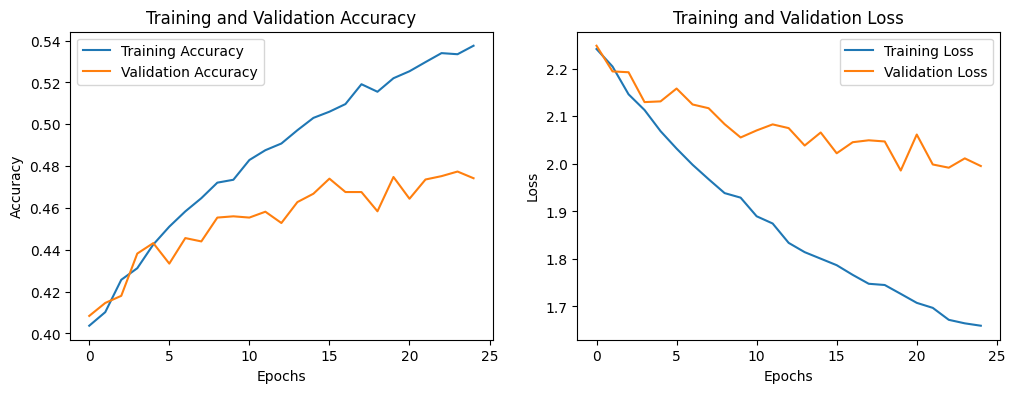

In [ ]:
# Plotting training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

## Predict

313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step


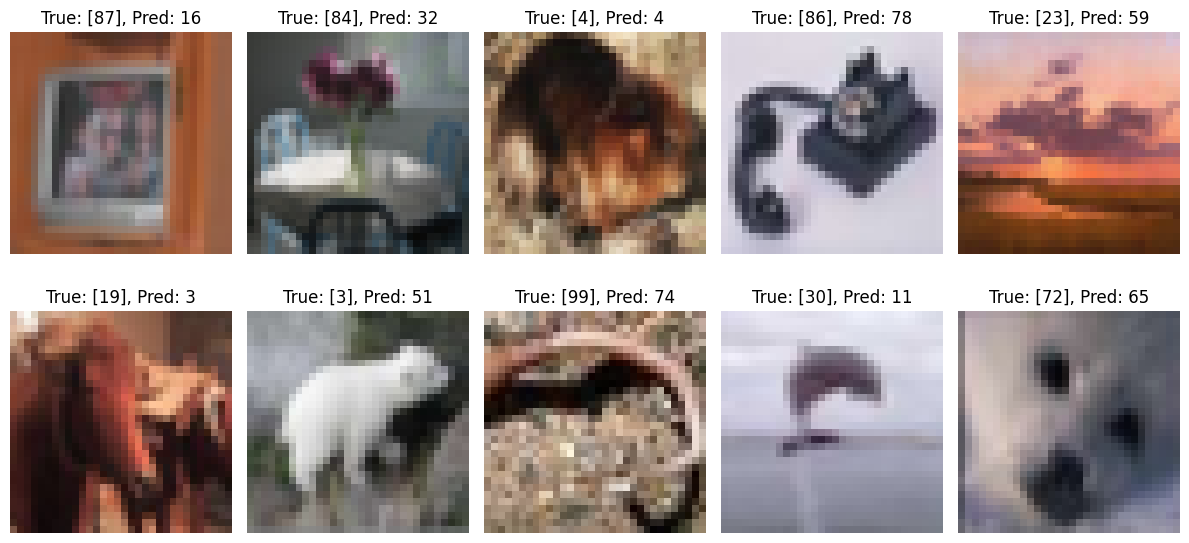

In [ ]:
# Make predictions on test data
predictions = cnn_model.predict(x_test)

# Convert predictions to class labels
predicted_classes = predictions.argmax(axis=-1)

# Get true class labels
true_classes = y_test

# Show a few test images, their true labels, and predicted labels
num_images = 10
# Sample w/o replacement
random_indices = np.random.choice(len(x_test), num_images, replace=False)

# Plot random images with pred and actual label
plt.figure(figsize=(12, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {true_classes[idx]}, Pred: {predicted_classes[idx]}")
    plt.axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

## Recap

**Model Performance and Analysis**

For the CIFAR-100 dataset, achieving a test accuracy of around 49% with a fairly basic CNN is decent. Given that CIFAR-100 has 100 classes, even a simple CNN architecture can struggle to achieve higher accuracy without advanced techniques.


Basic CNNs typically achieve 40-50% accuracy without much tuning or augmentation. More advanced architectures such as ResNet or using techniques like data augmentation can push the accuracy much higher, even into the range of 60-70%.

The current test loss of 1.96 indicates that while the model is learning, there is still significant room for improvement in both the training process and the model architecture.

**To improve performance, you could look at the following:**

- Refine the Architecture: Adding more layers, adjusting filter sizes, or experimenting with different pooling and activation functions can lead to better feature extraction.
- Apply Regularization: Techniques like dropout (tweak the value used here) or L2 regularization can help prevent overfitting, which is currently indicated by the fluctuations in validation accuracy.
- Data Augmentation: By augmenting the training data with transformations such as random cropping, rotations, and flips, we can artificially increase the diversity of the dataset, which helps the model generalize better.
- Explore Deeper Networks: Using architectures like ResNet or DenseNet (or other more SOTA approaches), which have demonstrated superior performance on CIFAR-100, could potentially push the model’s accuracy beyond 60%.